In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set_theme(style = 'white')
#sns.set_theme(style = 'darkgrid')
%matplotlib inline


#import time
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split, GridSearchCV


#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC


#from sklearn.metrics import classification_report
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix

import warnings;
warnings.filterwarnings('ignore');






C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#from matplotlib import style
#style.use('dark_background')

In [4]:
#!pip install jupyterthemes 
#!jt -t onedork
#from jupyterthemes import jtplot
#jtplot.style(theme ='monokai', context = 'notebook', ticks = True, grid = False)

In [5]:
ewl = pd.read_csv('ewl.csv', index_col = 0) #specifying the index 0 makes the EmpID the index
ewl

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low
2,0.80,0.86,5,262,6,0,0,sales,medium
3,0.11,0.88,7,272,4,0,0,sales,medium
4,0.72,0.87,5,223,5,0,0,sales,low
5,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,support,low
14996,0.37,0.48,2,160,3,0,0,support,low
14997,0.37,0.53,2,143,3,0,0,support,low


In [6]:
ee = pd.read_csv('ee.csv', index_col = 0)
ee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low
2002,0.82,0.67,2,202,3,0,0,sales,low
2003,0.45,0.69,5,193,3,0,0,sales,low
2004,0.78,0.82,5,247,3,0,0,sales,low
2005,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14207,0.90,0.55,3,259,10,1,1,management,high
14208,0.74,0.95,5,266,10,0,1,management,high
14209,0.85,0.54,3,185,10,0,1,management,high


Data Exploration

In [7]:
ee.shape

(11428, 9)

In [8]:
ewl.shape

(3571, 9)

In [9]:
ee.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [10]:
ewl.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [11]:
#adding a new column 'Attrition for existing employees'
ee['Attrition'] = 'No'
ee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low,No
2002,0.82,0.67,2,202,3,0,0,sales,low,No
2003,0.45,0.69,5,193,3,0,0,sales,low,No
2004,0.78,0.82,5,247,3,0,0,sales,low,No
2005,0.49,0.60,3,214,2,0,0,sales,low,No
...,...,...,...,...,...,...,...,...,...,...
14207,0.90,0.55,3,259,10,1,1,management,high,No
14208,0.74,0.95,5,266,10,0,1,management,high,No
14209,0.85,0.54,3,185,10,0,1,management,high,No


In [12]:
#adding a new column 'Attrition for employees who left' 
ewl['Attrition'] = 'Yes'
ewl

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
Emp ID,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low,Yes
2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
4,0.72,0.87,5,223,5,0,0,sales,low,Yes
5,0.37,0.52,2,159,3,0,0,sales,low,Yes
...,...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,support,low,Yes
14996,0.37,0.48,2,160,3,0,0,support,low,Yes
14997,0.37,0.53,2,143,3,0,0,support,low,Yes


In [13]:
#joining the two DataFrames
data = pd.concat([ewl,ee])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
Emp ID,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low,Yes
2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
4,0.72,0.87,5,223,5,0,0,sales,low,Yes
5,0.37,0.52,2,159,3,0,0,sales,low,Yes
...,...,...,...,...,...,...,...,...,...,...
14207,0.90,0.55,3,259,10,1,1,management,high,No
14208,0.74,0.95,5,266,10,0,1,management,high,No
14209,0.85,0.54,3,185,10,0,1,management,high,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 1 to 14211
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   Attrition              14999 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.3+ MB


In [15]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
dept                      10
salary                     3
Attrition                  2
dtype: int64

In [16]:
#checking data types
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
Attrition                 object
dtype: object

In [17]:
 #attrition unique values
data.Attrition.value_counts()/len(data)*100

No     76.191746
Yes    23.808254
Name: Attrition, dtype: float64

Key points about the dataset
1. There are 14999 observations and 10 features
2. The dataset contains data types float, integer and object
3. The data contains no missing values
4. Attrition is the target variable in this dataset while others  are independent variables.
5. About 24% of employees left the company while 76% remained.


Transforming target variable to numeric values(0,1)

In [18]:
#changing target variable  'Attrition' to 1 as 'Yes' and 0 as 'No'
data['Attrition'] = np.where(data['Attrition'] == 'Yes', 1, 0)

In [19]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
Emp ID,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low,1
2,0.80,0.86,5,262,6,0,0,sales,medium,1
3,0.11,0.88,7,272,4,0,0,sales,medium,1
4,0.72,0.87,5,223,5,0,0,sales,low,1
5,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14207,0.90,0.55,3,259,10,1,1,management,high,0
14208,0.74,0.95,5,266,10,0,1,management,high,0
14209,0.85,0.54,3,185,10,0,1,management,high,0


## EDA and Visualization

### Attrition

In [20]:
#setting color palette
col_pal = sns.color_palette('GnBu' , n_colors = 2)

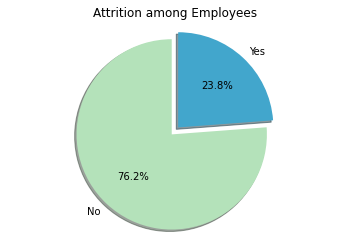

In [21]:
#pie plot
labels = 'No', 'Yes'
sizes = (data.Attrition.value_counts()/len(data)*100)
explode = (0.1, 0) # only explode first size
fig1,ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%0.1f%%', shadow = True, startangle = 90, colors = col_pal)
ax1.axis('equal') # ensures that the pie is drawn as a circle.
plt.title('Attrition among Employees')
plt.show()

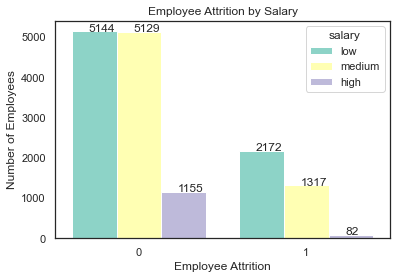

In [22]:
sns.set_theme(style = 'white')
ax = sns.countplot(x = 'Attrition', data = data,  hue = 'salary', palette = 'Set3', saturation = 1)
plt.title('Employee Attrition by Salary')
plt.xlabel('Employee Attrition')
plt.ylabel('Number of Employees')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))




From the above plot, about 60% of the employees who left have a low salary, followed by medium salary (about 37%).
Only about 2% of employees with high salary left.

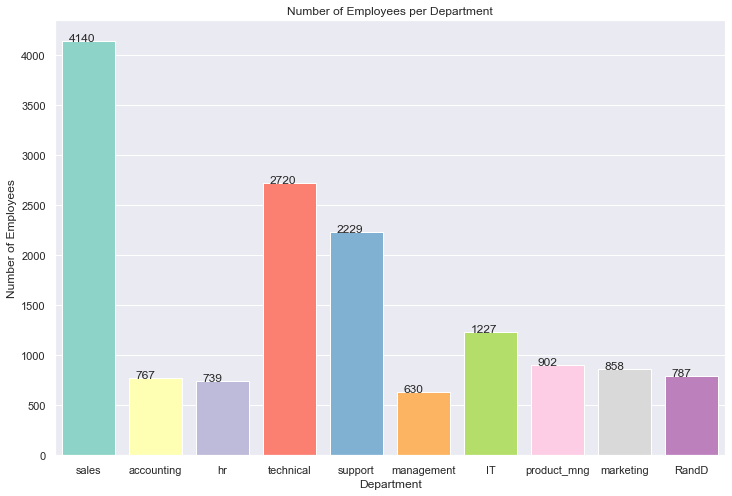

In [23]:
#setting dimensions of the plot

sns.set(rc= {'figure.figsize' : (12,8)}) #width 8, height 4
ax = sns.countplot(x = 'dept', data = data,  palette = 'Set3', saturation = 1)
plt.title('Number of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')



for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

Text(0, 0.5, 'Number of Employees')

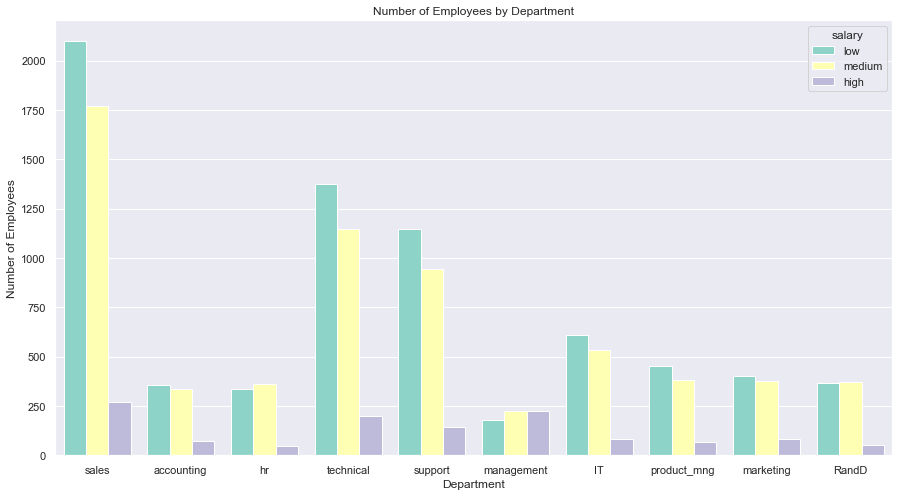

In [24]:
sns.set_theme(style = 'white')
sns.set(rc= {'figure.figsize' : (15,8)}) #width 8, height 4
sns.countplot(x = 'dept', data = data,  hue = 'salary', palette = 'Set3', saturation = 1)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')





In [25]:
#defining a function to show percentages 
def perct(ax,feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width()/2-0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x,y), size = 12)

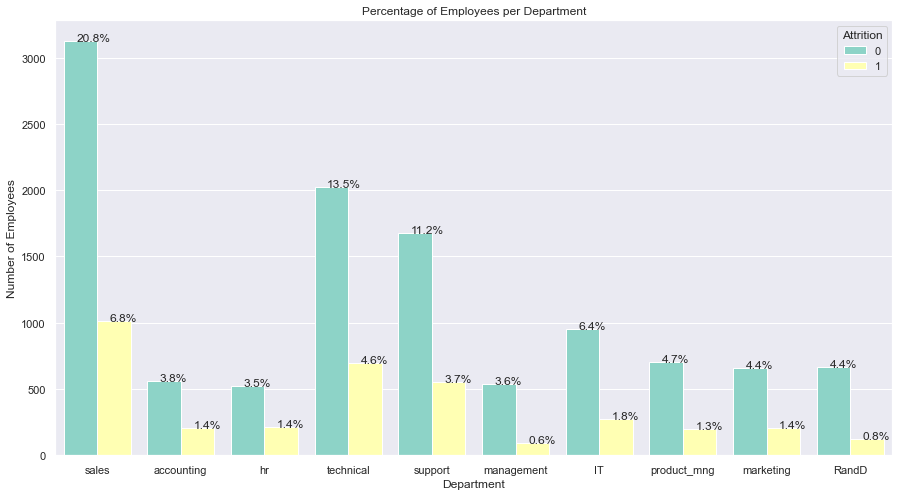

In [26]:
#displaying plots
ax = sns.countplot(x = 'dept', data = data, hue = 'Attrition', palette = 'Set3', saturation = 1)
plt.title('Percentage of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')


perct(ax, data.dept)

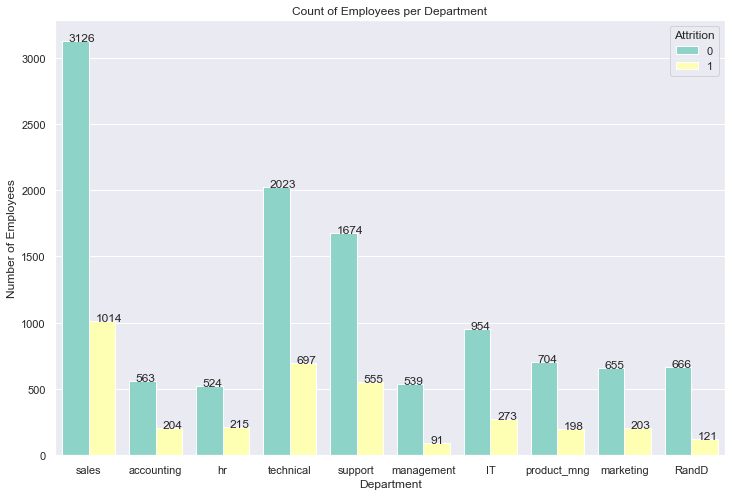

In [27]:
#setting dimensions of the plot

sns.set(rc= {'figure.figsize' : (12,8)}) #width 8, height 4
ax = sns.countplot(x = 'dept', data = data, hue = 'Attrition', palette = 'Set3', saturation = 1)
plt.title('Count of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')



for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

As shown in the above plots, considering the total employees in the organization, Management department has the lowest percentage of employees who left (0.6%), with the highest percentage in Sales (6.8%).
However, considering the number of employees who left per department, sales department has the highest number of employees.
29% of employees in HR left, followed by Accounting(27%), Technical (26%), Support (25%), Sales and Marketing (24%), IT and Product_mng(22%), RandD (15%), Management(14%).

<AxesSubplot:>

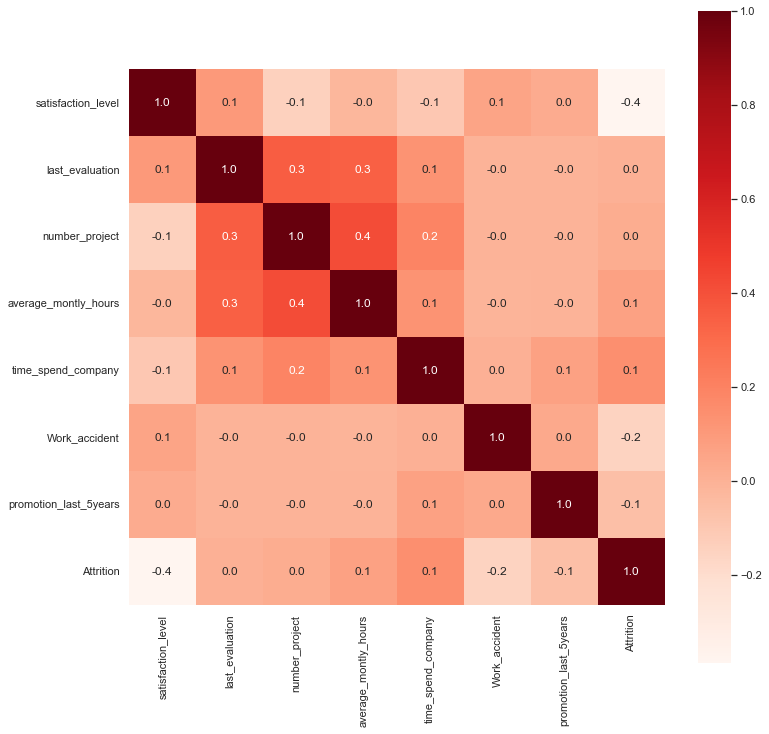

In [28]:
#showing the correlation of the target variable with other variables
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

### Uni Variate Numerical Feature Analysis

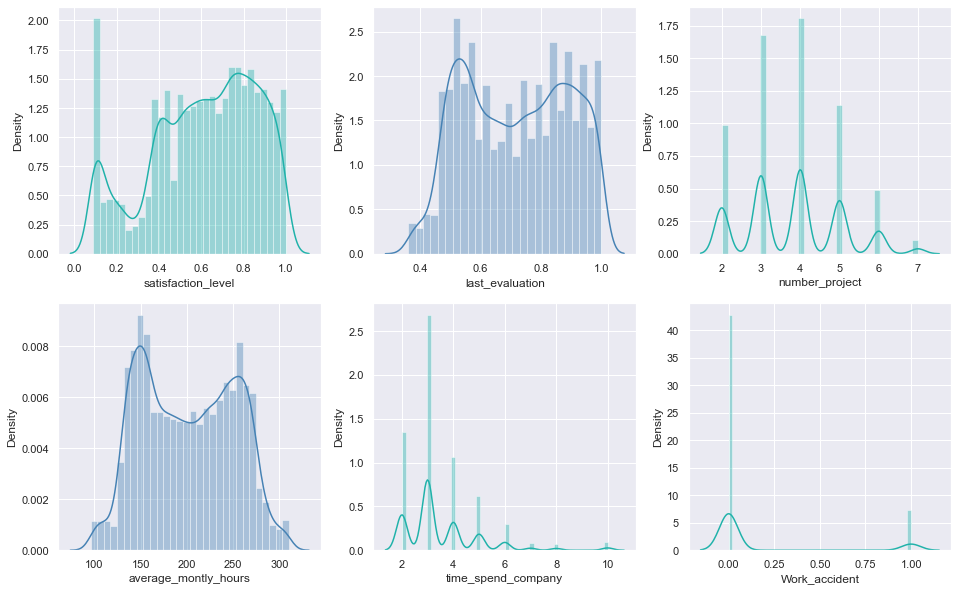

In [29]:
fig, axes = plt.subplots(2,3, figsize = (16,10))
sns.distplot(data['satisfaction_level'], ax = axes[0,0], color = 'lightseagreen')
sns.distplot(data['last_evaluation'], ax = axes[0,1], color = 'steelblue')
sns.distplot(data['number_project'], ax = axes[0,2], color = 'lightseagreen')
sns.distplot(data['average_montly_hours'], ax = axes[1,0], color = 'steelblue')
sns.distplot(data['time_spend_company'], ax = axes[1,1], color = 'lightseagreen')
sns.distplot(data['Work_accident'], ax = axes[1,2], color = 'lightseagreen')

plt.show()

From the above plots, outliers are observed in satisfaction_level, number_project, time_spend_company and work_accident

### Bi Variate Categorical Feature Analysis

In [30]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
Emp ID,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low,1
2,0.80,0.86,5,262,6,0,0,sales,medium,1
3,0.11,0.88,7,272,4,0,0,sales,medium,1
4,0.72,0.87,5,223,5,0,0,sales,low,1
5,0.37,0.52,2,159,3,0,0,sales,low,1


In [32]:
mean_sat_dept = data.groupby(['dept', 'Attrition'])['satisfaction_level'].mean().to_frame()
mean_sat_dept

satisfaction_level
dept        Attrition                    
IT          0                    0.677170
            1                    0.411868
RandD       0                    0.653799
            1                    0.432810
accounting  0                    0.647211
            1                    0.402598
hr          0                    0.666679
            1                    0.433395
management  0                    0.654861
            1                    0.422857
marketing   0                    0.669878
            1                    0.453153
product_mng 0                    0.658466
            1                    0.481566
sales       0                    0.668548
            1                    0.447663
support     0                    0.673799
            1                    0.450901
technical   0                    0.668319
            1                    0.432525

In [33]:
mean_sat = data.groupby(['Attrition'])['satisfaction_level'].mean().to_frame()
mean_sat

,satisfaction_level
Attrition,
0,0.666810
1,0.440098


 From the above table, the mean satisfaction level could be a factor contributing to Attrition. The mean satisfactory level of Employees who left in each department is less than that of Existing employees

The Employees who Attrited have a lower satisfaction level compared to existing employees

In [34]:
data.groupby(['dept', 'Attrition'])['last_evaluation'].mean().to_frame()

last_evaluation
dept        Attrition                 
IT          0                 0.713050
            1                 0.730037
RandD       0                 0.706081
            1                 0.745372
accounting  0                 0.726128
            1                 0.694510
hr          0                 0.720802
            1                 0.679721
management  0                 0.723451
            1                 0.727253
marketing   0                 0.723282
            1                 0.692020
product_mng 0                 0.711435
            1                 0.726566
sales       0                 0.709223
            1                 0.711243
support     0                 0.721714
            1                 0.727315
technical   0                 0.716609
            1                 0.734132

Text(0.5, 1.0, 'Last Evaluation')

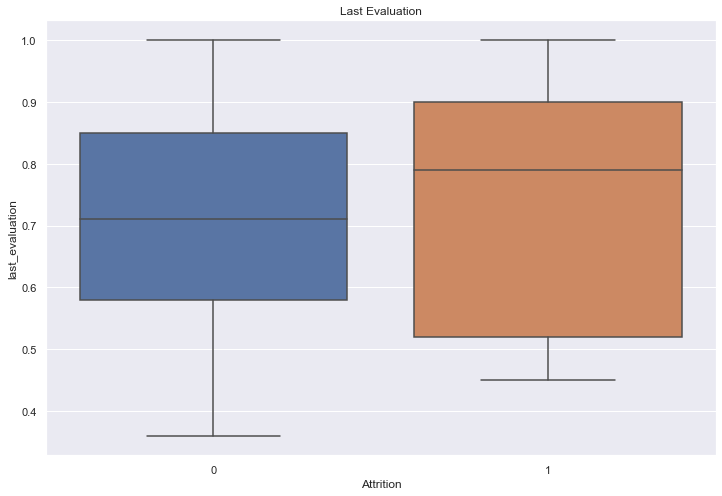

In [35]:
sns.boxplot(x = 'Attrition', y = 'last_evaluation', data = data)
plt.title('Last Evaluation')

In [36]:
data.groupby(['Attrition'])['last_evaluation'].mean().to_frame()


,last_evaluation
Attrition,
0,0.715473
1,0.718113


surprisingly, even though employees who left generally have a low salary, they have almost the same evaluation with the existing employees which further corroborates the fact that they were underpaid

In [37]:
data.groupby(['dept', 'Attrition'])['number_project'].mean().to_frame()

number_project
dept        Attrition                
IT          0                3.756813
            1                4.025641
RandD       0                3.822823
            1                4.024793
accounting  0                3.808171
            1                3.872549
hr          0                3.702290
            1                3.539535
management  0                3.812616
            1                4.142857
marketing   0                3.720611
            1                3.581281
product_mng 0                3.795455
            1                3.848485
sales       0                3.789187
            1                3.736686
support     0                3.783751
            1                3.864865
technical   0                3.814632
            1                4.061693

In [38]:
data.groupby(['Attrition'])['number_project'].mean().to_frame()

,number_project
Attrition,
0,3.786664
1,3.855503


<AxesSubplot:xlabel='number_project', ylabel='count'>

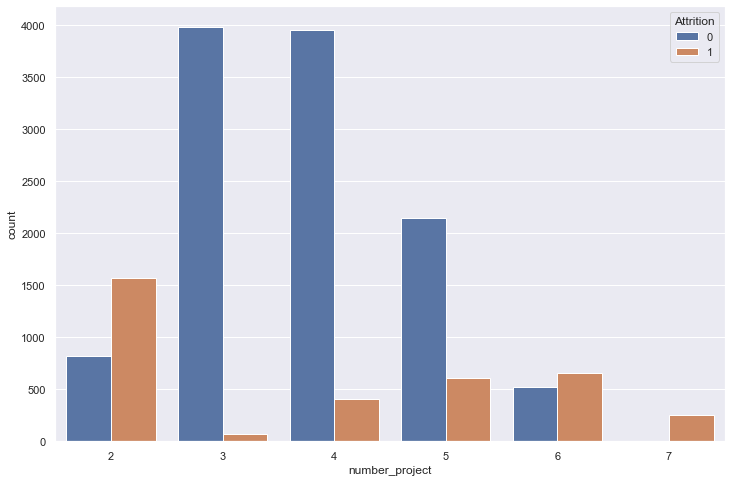

In [39]:
sns.countplot('number_project', hue = 'Attrition', data=data)

Employees who left also carried out a higher number of projects even though they had a lower salary

In [40]:
data.groupby(['dept', 'Attrition'])['average_montly_hours'].mean().to_frame()

average_montly_hours
dept        Attrition                      
IT          0                    198.886792
            1                    213.849817
RandD       0                    198.951952
            1                    210.975207
accounting  0                    199.037300
            1                    207.029412
hr          0                    199.250000
            1                    197.306977
management  0                    200.233766
            1                    207.263736
marketing   0                    198.888550
            1                    200.990148
product_mng 0                    197.765625
            1                    207.787879
sales       0                    199.571657
            1                    205.041420
support     0                    199.140980
            1                    205.636036
technical   0                    198.471083
            1                    214.183644

Text(0.5, 1.0, 'Average Monthly Hours by Attrition')

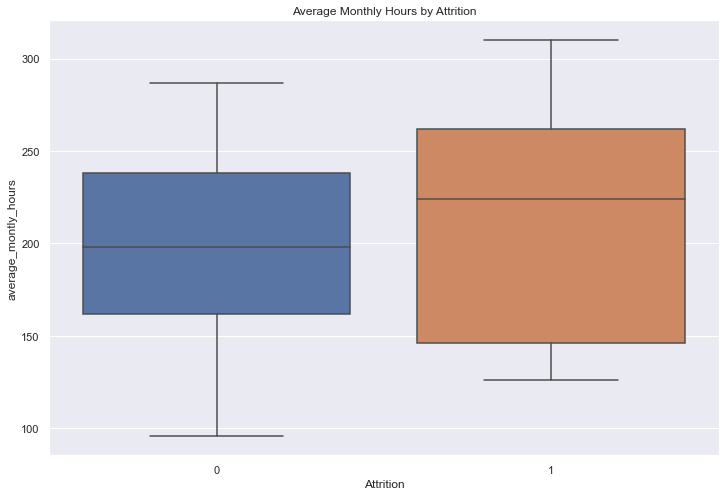

In [41]:
sns.boxplot(x = 'Attrition', y = 'average_montly_hours', data = data)
plt.title('Average Monthly Hours by Attrition')

In [42]:
data.groupby(['Attrition'])['average_montly_hours'].mean().to_frame()

,average_montly_hours
Attrition,
0,199.060203
1,207.419210


In [37]:
data.groupby(['dept', 'Attrition'])['time_spend_company'].mean().to_frame()

time_spend_company
dept        Attrition                    
IT          0                    3.356394
            1                    3.860806
RandD       0                    3.252252
            1                    4.000000
accounting  0                    3.424512
            1                    3.794118
hr          0                    3.192748
            1                    3.753488
management  0                    4.395176
            1                    3.758242
marketing   0                    3.480916
            1                    3.857143
product_mng 0                    3.330966
            1                    3.989899
sales       0                    3.443698
            1                    3.812623
support     0                    3.213859
            1                    3.933333
technical   0                    3.222442
            1                    3.959828

<AxesSubplot:xlabel='Attrition', ylabel='time_spend_company'>

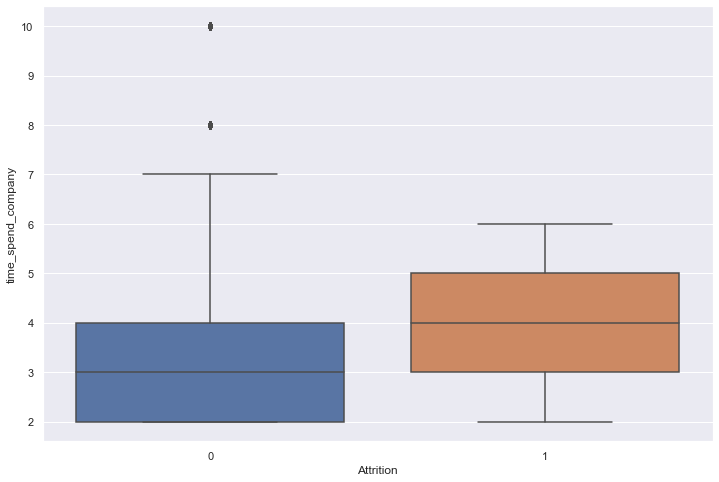

In [38]:
sns.boxplot(x = 'Attrition', y = 'time_spend_company', data = data)

In [41]:
data.groupby(['Attrition'])['time_spend_company'].mean().to_frame()

,time_spend_company
Attrition,
0,3.380032
1,3.876505


Employees who left had been in the company for longer

In [39]:
data.groupby(['dept', 'Attrition'])['Work_accident'].mean().to_frame()

Work_accident
dept        Attrition               
IT          0               0.162474
            1               0.032967
RandD       0               0.186186
            1               0.082645
accounting  0               0.154529
            1               0.044118
hr          0               0.156489
            1               0.032558
management  0               0.181818
            1               0.054945
marketing   0               0.195420
            1               0.049261
product_mng 0               0.174716
            1               0.045455
sales       0               0.173065
            1               0.045365
support     0               0.187575
            1               0.055856
technical   0               0.172022
            1               0.047346

In [42]:
data.groupby(['Attrition'])['Work_accident'].mean().to_frame()

,Work_accident
Attrition,
0,0.175009
1,0.047326


In [40]:
corr_data = data.corr()
corr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
Attrition,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


Converting categorical Features

In [41]:

Dept = pd.get_dummies(data['dept'], drop_first = True)
Salary = pd.get_dummies(data['salary'], drop_first = True)

In [42]:
Dept.head()

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Emp ID,,,,,,,,,
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,0,0


In [43]:
Salary.head()

,low,medium
Emp ID,,
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0


In [44]:
data.drop(['dept', 'salary'], axis = 1, inplace = True)

In [45]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
Emp ID,,,,,,,,
1,0.38,0.53,2,157,3,0,0,1
2,0.80,0.86,5,262,6,0,0,1
3,0.11,0.88,7,272,4,0,0,1
4,0.72,0.87,5,223,5,0,0,1
5,0.37,0.52,2,159,3,0,0,1


In [46]:
data= pd.concat([data,Dept, Salary], axis = 1)

In [47]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
Emp ID,,,,,,,,,,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0


Building a Logistic Regression Model

In [48]:
#splitting data into test and train sets
#train test split
from sklearn.model_selection import train_test_split

In [49]:
x = data [['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng','sales', 'support', 'technical', 'low','medium']]
y = data['Attrition']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

Training and Predicting

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
#logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
prediction = logmodel.predict(x_test)

Evaluation

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3442
           1       0.63      0.37      0.47      1058

    accuracy                           0.80      4500
   macro avg       0.73      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



In [56]:
from sklearn import metrics

In [57]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[3210,  232],
       [ 664,  394]], dtype=int64)

In [58]:
#r = df.groupby('Attrition')['Attrition'].count()
#plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

Summary

24% of employees left the company
Based on this dataset, some reasons why employees may have left include:
1. Low salary (60% of employees who left have a low salary)
2. Low satisfaction level. Employees who left have a low satisfaction level of about 0.4 while those who remained have a higher satisfaction level of about 0.7.
3. Higher average monthly hours. Employees who left have a higher average monthly hours (207) compared to employees who remained (199)

